# Preparation

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

# change working diretory
# import os
# os.chdir("/content/gdrive/MyDrive/Dissertation/")

Mounted at /content/gdrive


In [2]:
!ls runs/detect
# %cd drive/MyDrive/Dissertation

ls: cannot access 'runs/detect': No such file or directory


Make sure GPU work fine.

In [3]:
!nvidia-smi

Wed Aug  9 13:23:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Make sure we are in the right working directory.

In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


Install YOLOv8.

In [5]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 25.5 GB RAM, 24.4/166.8 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

# Download the original dataset

Download the dataset.

Train:Val:Test = 30:10:10

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="lOVTQ88BgSlHqrup7AYi")
project = rf.workspace("dissertation-bqltf").project("minneapple-floor-set")
dataset = project.version(7).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to MinneApple-floor-set-7 in yolov8:: 100%|██████████| 112/112 [00:00<00:00, 3157.79it/s]


# Train Baseline Model

In [ ]:
%cd {HOME}

# Train
!yolo task=detect mode=train model={HOME}/gdrive/My\ Drive/Dissertation/Models/augmented_best.pt data={dataset.location}/data.yaml epochs=300 imgsz=720 plots=True batch=8

# Tune 1:
# !yolo task=detect mode=train model={HOME}/gdrive/My\ Drive/Dissertation/Models/augmented_best.pt data={dataset.location}/data.yaml epochs=300 imgsz=720 plots=True patience=20

# Tune 2:
# !yolo task=detect mode=train model={HOME}/gdrive/My\ Drive/Dissertation/Models/augmented_best.pt data={dataset.location}/data.yaml epochs=300 imgsz=720 plots=True patience=20 batch=32


/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/MinneApple-floor-set-7/data.yaml, epochs=300, patience=50, batch=8, imgsz=720, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, 

In [ ]:
# !ls {HOME}/runs/detect/train4/  # check the model is prodeced

In [ ]:
%cp {HOME}/runs/detect/train2/weights/best.pt /content/gdrive/My\ Drive/Dissertation/Models
%cp {HOME}/runs/detect/train2/weights/last.pt /content/gdrive/My\ Drive/Dissertation/Models
%cp {HOME}/runs/detect/train2/results.png /content/gdrive/My\ Drive/Dissertation/Models
# %cp {HOME}/runs/detect/train/confusion_matrix.png /content/gdrive/My\ Drive/Dissertation/Models
# %cp {HOME}/runs/detect/train/val_batch0_pred.jpg /content/gdrive/My\ Drive/Dissertation/Models


/content


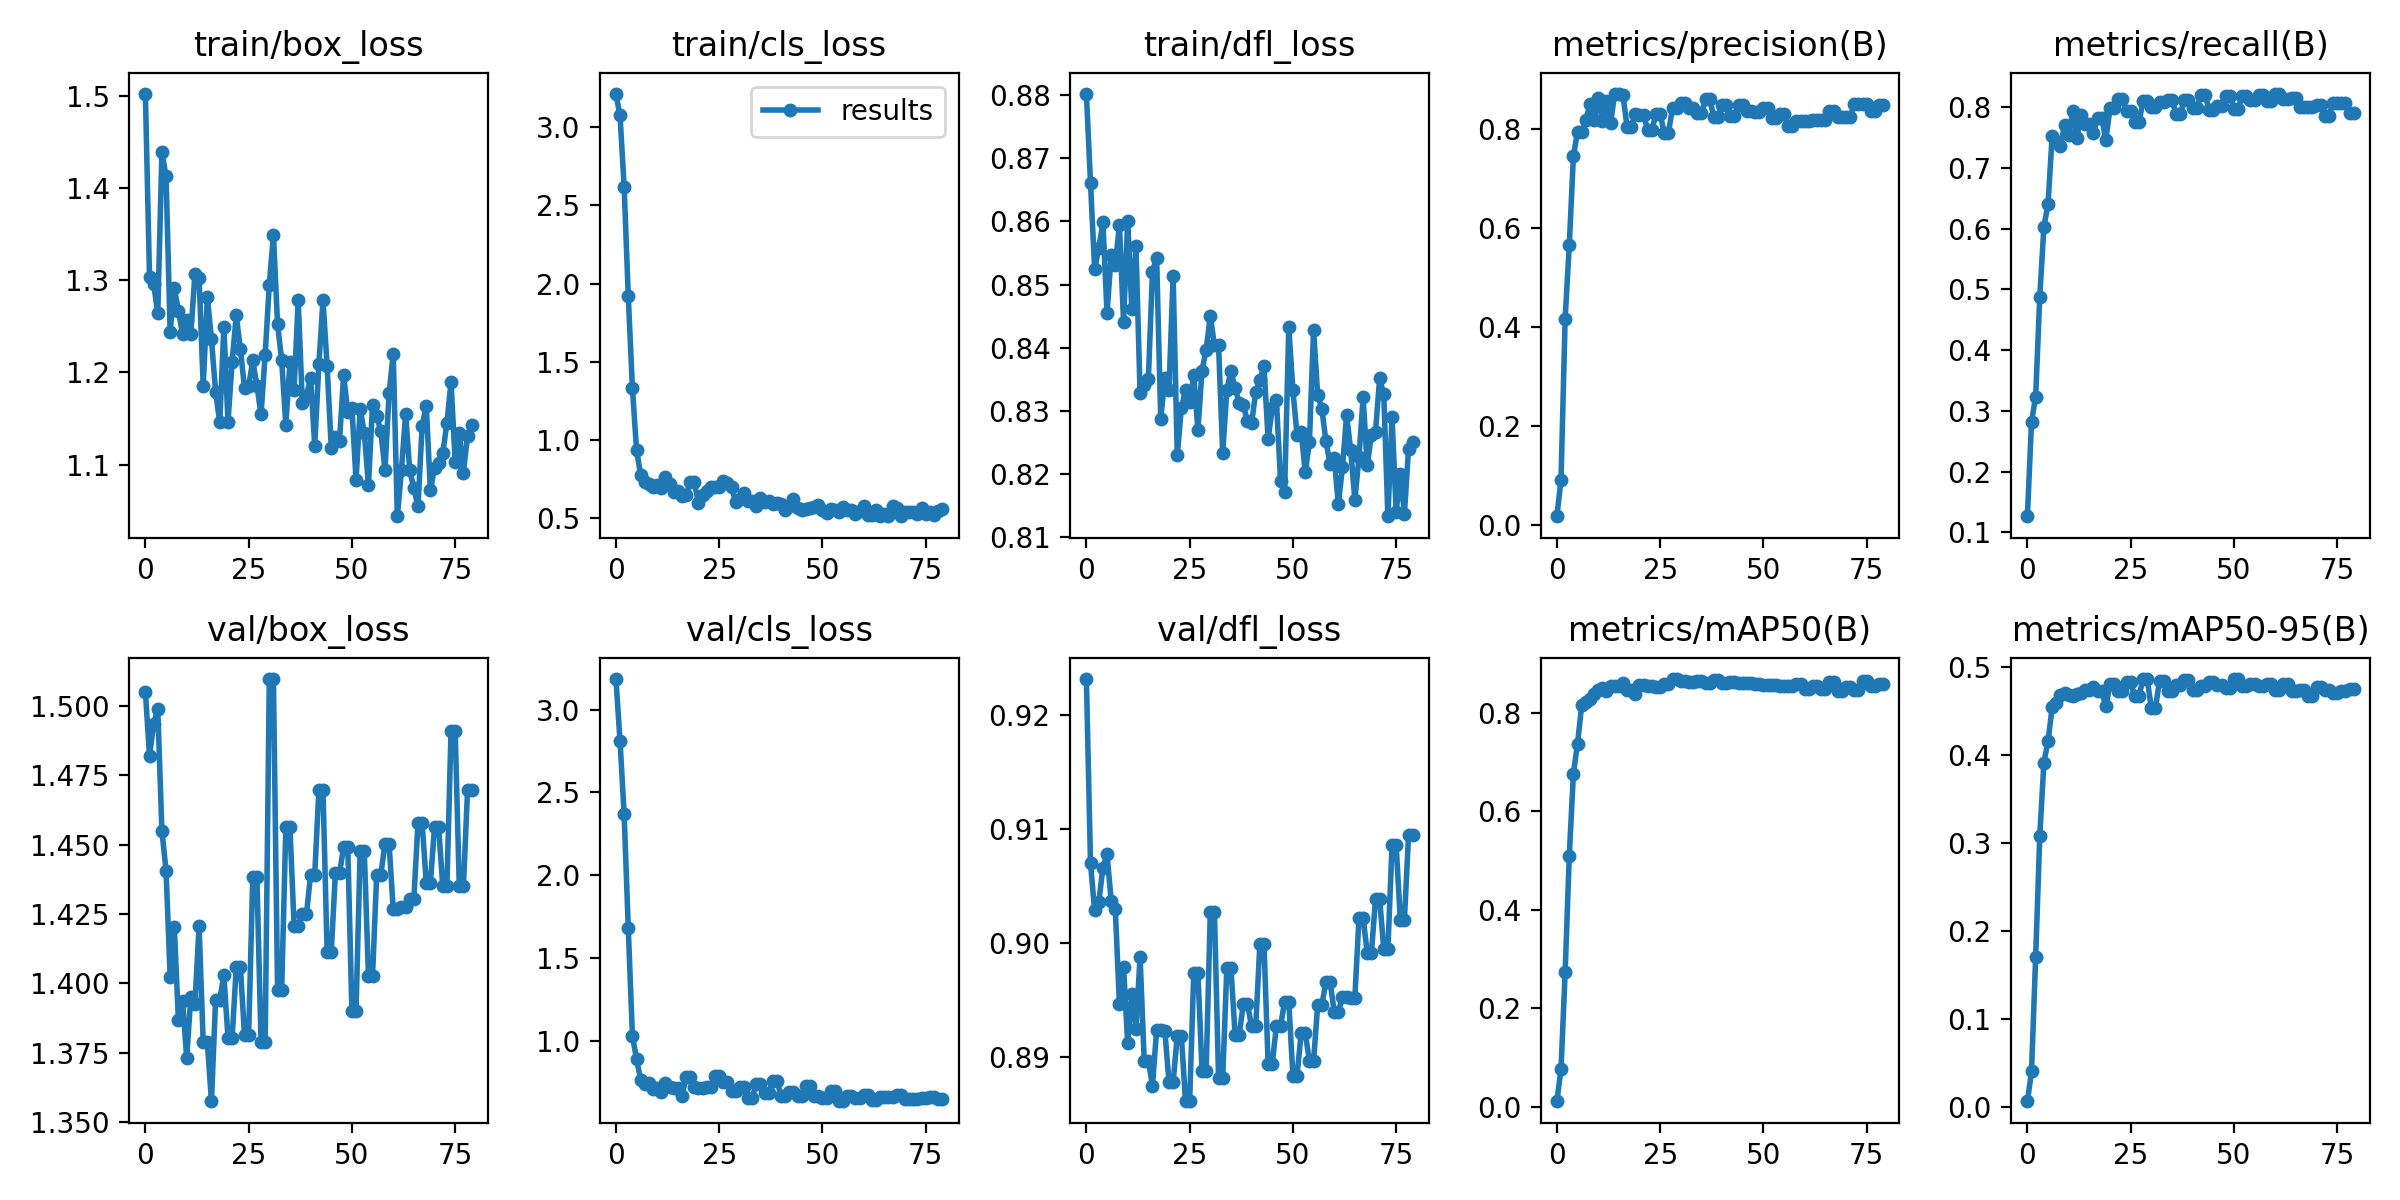

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=700)
# Image(filename=f'{HOME}/gdrive/MyDrive/Dissertation/Models/results.png', width=700)

In [ ]:
%cd {HOME}
# Image(filename=f'{HOME}/runs/detect/train7/confusion_matrix.png', width=700)

## Inference with the Model

### Produce detection results

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True hide_labels=True

# !yolo task=detect mode=predict model={HOME}/gdrive/My\ Drive/Dissertation/Models/best.pt conf=0.25 source={dataset.location}/test/images save=True hide_labels=True

/content
2023-08-08 14:09:59.797428: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-08 14:10:00.642951: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/10 /content/datasets/MinneApple-floor-set-7/test/images/20150919_174151_image161_png-_jpg.rf.26b948026e3d8d40e684f5cea5a96cb4.jpg: 736x416 129 apples, 5 apple_on_floors, 67.1ms
image 2/10 /content/datasets/MinneApple-floor-set-7/test/images/20150921_131234_image476_png-_jpg.rf.a8d763fa2b6f919f711f3c8d44ae447a.jpg: 736x416 63 apples, 28 apple_on_floors, 13.7ms
image 3/10 /conte

**NOTE:** Let's take a look at few results.

In [ ]:
# import glob
# from IPython.display import Image, display

# for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
#       display(Image(filename=image_path, width=300))
#       print("\n")

### Evaluate the model on test set
Produce the performance of the model on the test set.

All other metrics are much higher than the training and validating reaults

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data_test.yaml

# !yolo task=detect mode=val model={HOME}/gdrive/My\ Drive/Dissertation/Models/best.pt data={dataset.location}/data_test.yaml

/content
2023-08-08 14:10:07.828647: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-08 14:10:08.666989: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/MinneApple-floor-set-7/test/labels... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<00:00, 843.98it/s]
val: New cache created: /content/datasets/MinneApple-floor-set-7/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.08it/s]
                   all         10   

# Download the augmented dataset

Download the dataset.

Train:Val:Test = 90:10:10

In [8]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

# from roboflow import Roboflow
# rf = Roboflow(api_key="lOVTQ88BgSlHqrup7AYi")
# project = rf.workspace("dissertation-bqltf").project("minneapple-floor-set")
# dataset = project.version(8).download("yolov8")

# second
# from roboflow import Roboflow
# rf = Roboflow(api_key="lOVTQ88BgSlHqrup7AYi")
# project = rf.workspace("dissertation-bqltf").project("minneapple-floor-set")
# dataset = project.version(9).download("yolov8")


# third
from roboflow import Roboflow
rf = Roboflow(api_key="lOVTQ88BgSlHqrup7AYi")
project = rf.workspace("dissertation-bqltf").project("minneapple-floor-set")
dataset = project.version(10).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to MinneApple-floor-set-10 in yolov8:: 100%|██████████| 232/232 [00:00<00:00, 2196.32it/s]


# Tune Model

Tune on the first augmented datast

In [ ]:
%cd {HOME}

# Train
# !yolo task=detect mode=train model={HOME}/gdrive/My\ Drive/Dissertation/Models/original_floor_best.pt data={dataset.location}/data.yaml epochs=1000 imgsz=720 plots=True batch=8 patience=100

# Tune 1: batch = 12
# !yolo task=detect mode=train model={HOME}/gdrive/My\ Drive/Dissertation/Models/augmented_floor_best.pt data={dataset.location}/data.yaml epochs=1000 imgsz=720 plots=True batch=12 patience=100

# Tune 2: batch = 4
# !yolo task=detect mode=train model={HOME}/gdrive/My\ Drive/Dissertation/Models/augmented_floor_best.pt data={dataset.location}/data.yaml epochs=1000 imgsz=720 plots=True batch=4 patience=100




/content


Tune on the second augmented datast

In [ ]:
%cd {HOME}

# Train
!yolo task=detect mode=train model={HOME}/gdrive/My\ Drive/Dissertation/Models/original_floor_best.pt data={dataset.location}/data.yaml epochs=1000 imgsz=720 plots=True batch=12 patience=100

# Tune 1: batch = 12
# !yolo task=detect mode=train model={HOME}/gdrive/My\ Drive/Dissertation/Models/augmented_floor_best.pt data={dataset.location}/data.yaml epochs=1000 imgsz=720 plots=True batch=12 patience=100

# Tune 2: batch = 4
# !yolo task=detect mode=train model={HOME}/gdrive/My\ Drive/Dissertation/Models/augmented_floor_best.pt data={dataset.location}/data.yaml epochs=1000 imgsz=720 plots=True batch=4 patience=100




/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/MinneApple-floor-set-9/data.yaml, epochs=1000, patience=100, batch=12, imgsz=720, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fals

Tune on the third augmented datast

In [27]:
%cd {HOME}

# Train
# !yolo task=detect mode=train model={HOME}/gdrive/MyDrive/Dissertation/Models/original_floor_best.pt data={dataset.location}/data.yaml epochs=1000 imgsz=720 plots=True batch=12 patience=100

# Tune 1: batch = 8
# !yolo task=detect mode=train model={HOME}/runs/detect/train9/weights/last.pt data={dataset.location}/data.yaml epochs=500 imgsz=720 plots=True batch=8

# Tune 2: batch = 4
!yolo task=detect mode=train model={HOME}/gdrive/MyDrive/Dissertation/Models/last.pt data={dataset.location}/data.yaml epochs=500 imgsz=720 plots=True batch=4 patience=200  # 100




/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/MinneApple-floor-set-10/data.yaml, epochs=500, patience=200, batch=4, imgsz=720, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False

In [ ]:
# !ls {HOME}/runs/detect/train4/  # check the model is prodeced

In [28]:
%cp {HOME}/runs/detect/train/weights/best.pt /content/gdrive/My\ Drive/Dissertation/Models
%cp {HOME}/runs/detect/train/weights/last.pt /content/gdrive/My\ Drive/Dissertation/Models
%cp {HOME}/runs/detect/train/results.png /content/gdrive/My\ Drive/Dissertation/Models
# %cp {HOME}/runs/detect/train/confusion_matrix.png /content/gdrive/My\ Drive/Dissertation/Models
# %cp {HOME}/runs/detect/train/val_batch0_pred.jpg /content/gdrive/My\ Drive/Dissertation/Models


/content


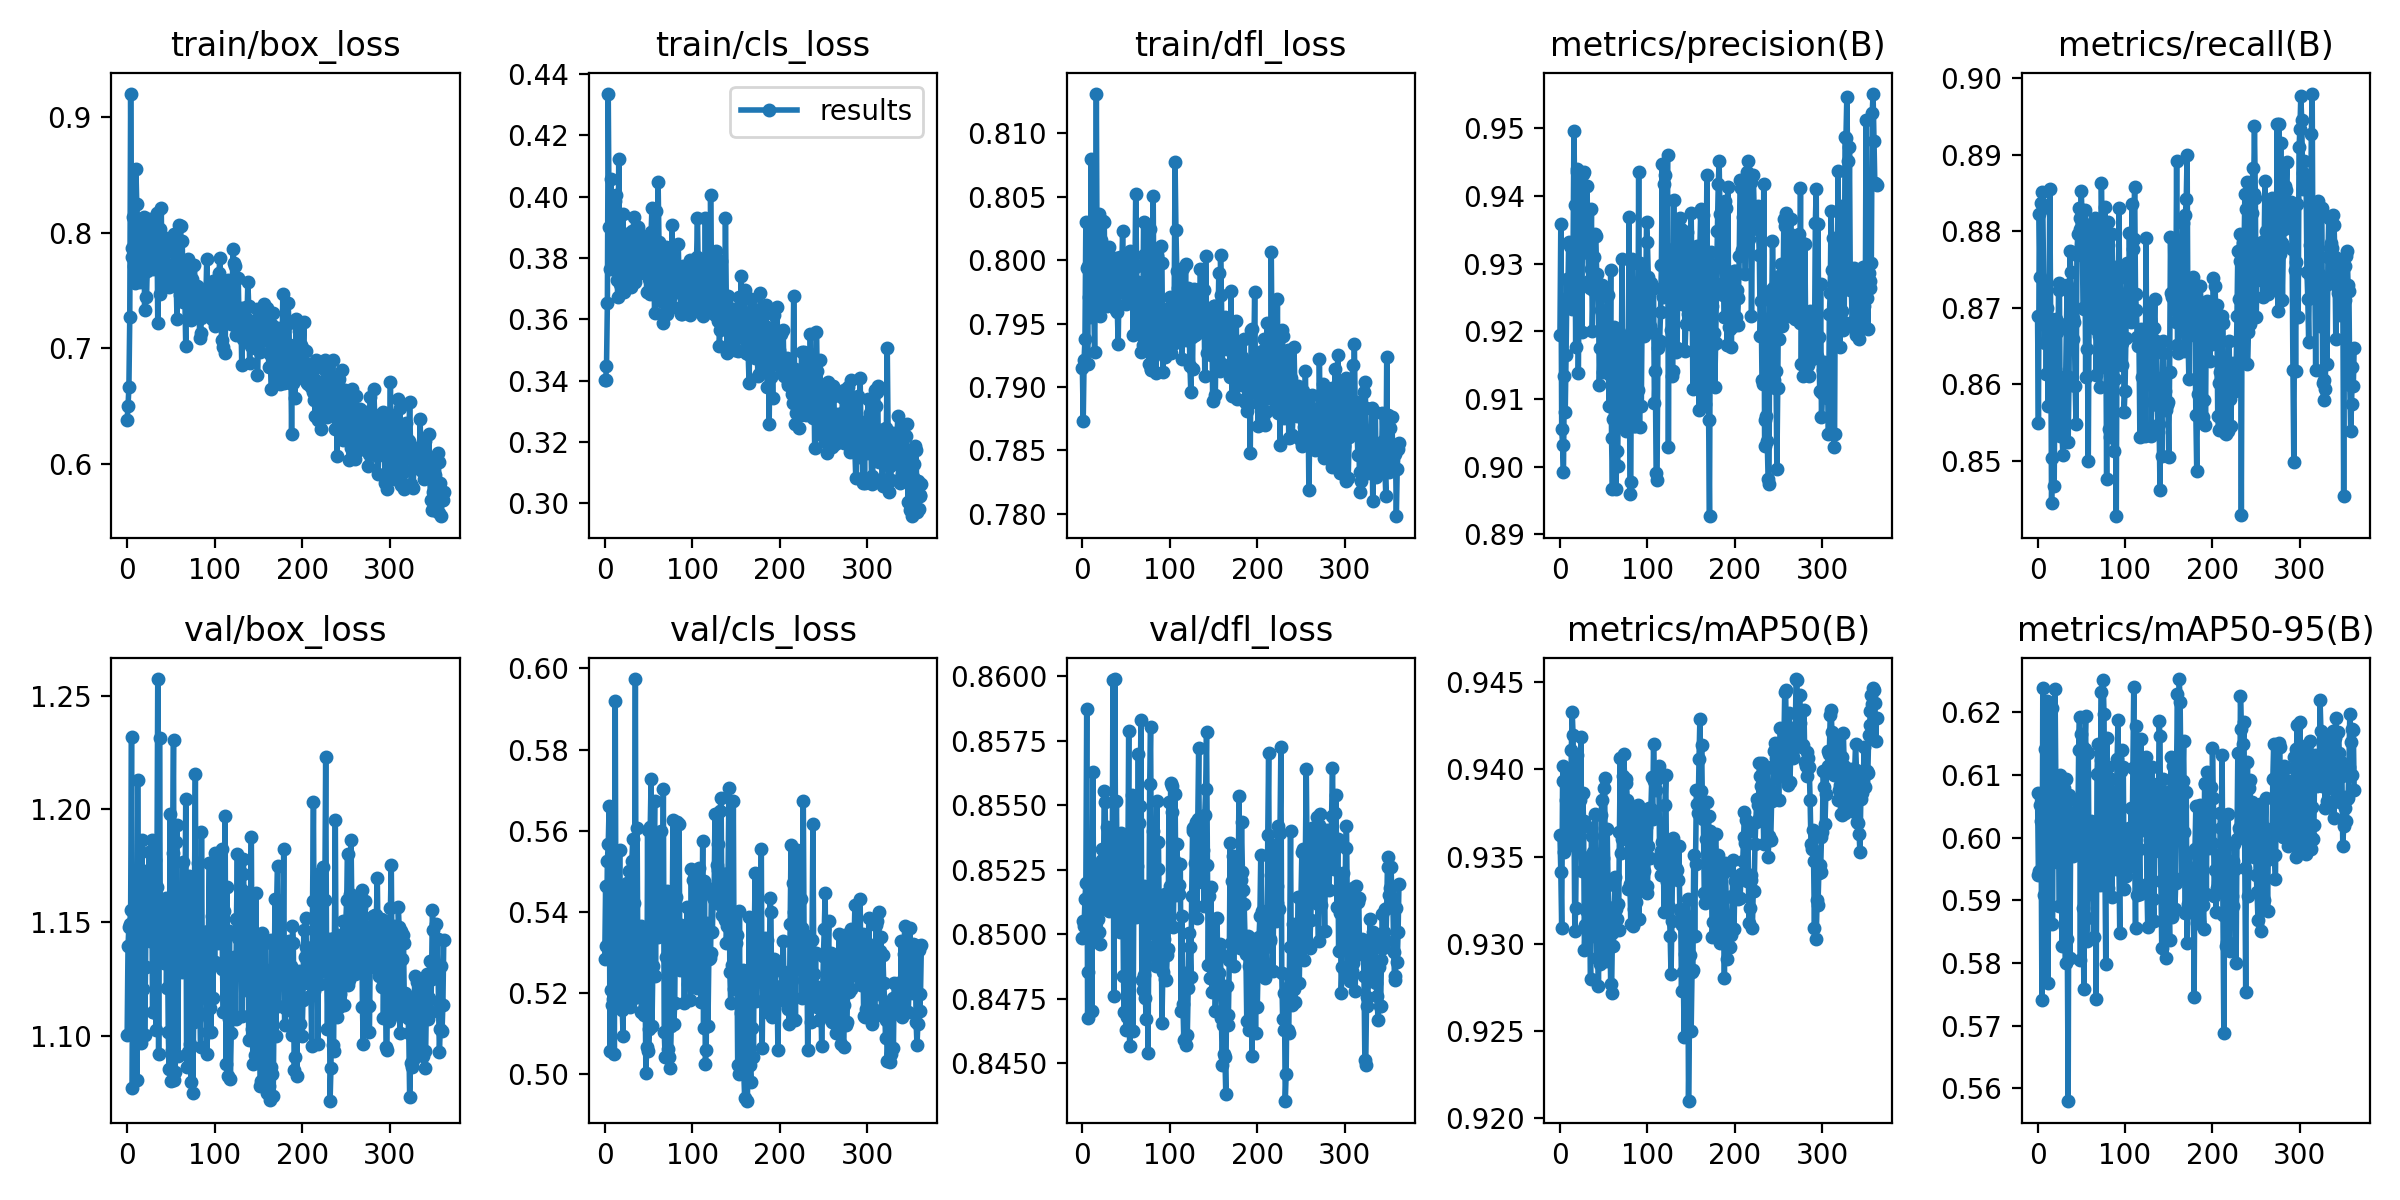

In [29]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=700)
# Image(filename=f'{HOME}/gdrive/MyDrive/Dissertation/Models/results.png', width=700)

In [ ]:
%cd {HOME}
# Image(filename=f'{HOME}/runs/detect/train7/confusion_matrix.png', width=700)

## Inference with the Model

### Evaluate the model on test set
Produce the performance of the model on the test set.

All other metrics are much higher than the training and validating reaults

In [30]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data_test.yaml

# !yolo task=detect mode=val model={HOME}/gdrive/MyDrive/Dissertation/Models/augmented_floor_best.pt data={dataset.location}/data_test.yaml

/content
2023-08-09 15:05:27.499371: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-09 15:05:28.463792: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/MinneApple-floor-set-10/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.18it/s]
                   all         10        748       0.93      0.873      0.941      0.627
                 apple 

### Produce detection results

In [33]:
%cd {HOME}
# !yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True hide_labels=True save_txt=True
#
!yolo task=detect mode=predict model={HOME}/gdrive/MyDrive/Dissertation/Models/augmented_floor_best.pt conf=0.25 source={dataset.location}/test/images save=True hide_labels=True save_txt=True

/content
2023-08-09 15:08:31.400332: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-09 15:08:32.366407: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/10 /content/datasets/MinneApple-floor-set-10/test/images/20150919_174151_image161_png-_jpg.rf.719f2c00194cc58cdbfe3f893afd0e16.jpg: 736x416 111 apples, 1 apple_on_floor, 70.7ms
image 2/10 /content/datasets/MinneApple-floor-set-10/test/images/20150921_131234_image476_png-_jpg.rf.393b4ed31e8b8a443435b283f7154c3e.jpg: 736x416 64 apples, 32 apple_on_floors, 13.7ms
image 3/

Ground truth

Number of apples on the tree:  468

Number of apples on the ground:  313

Total: 781

The percentage of apples on the ground: 40.00%


In [44]:
import os
path = "runs/detect/predict4/labels" # path of the folder that saves labels

numOfApples = 0
numOfApplesOnFloor = 0

files= os.listdir(path) # get all file name under the folder path
for file in files:
     if not os.path.isdir(file): # open only file
          with open(path+"/"+file, 'r',encoding="utf8") as f:
            for line in f.readlines():
              # print(line)
              if int(line[0]) == 0:
                # this indicates it is an apple on the tree
                numOfApples = numOfApples + 1
              else:
                numOfApplesOnFloor = numOfApplesOnFloor + 1

print("Number of apples on the tree: ", numOfApples,
      ", error to the ground truth: {:.2f}%".format(abs(468-numOfApples)/468*100),
      "\nNumber of apples on the ground: ", numOfApplesOnFloor,
      ", error to the ground truth: {:.2f}%".format(abs(313-numOfApplesOnFloor)/313*100))
perc = numOfApplesOnFloor/(numOfApples+numOfApplesOnFloor)
print("The percentage of apples on the ground: {:.2f}%".format(perc*100),
      ", error to the ground truth: {:.2f}%".format(abs(0.4-perc)/0.4*100))

Number of apples on the tree:  448 , error to the ground truth: 4.27% 
Number of apples on the ground:  256 , error to the ground truth: 18.21%
The percentage of apples on the ground: 36.36% , error to the ground truth: 9.09%
Error to the ground truth


**NOTE:** Let's take a look at few results.

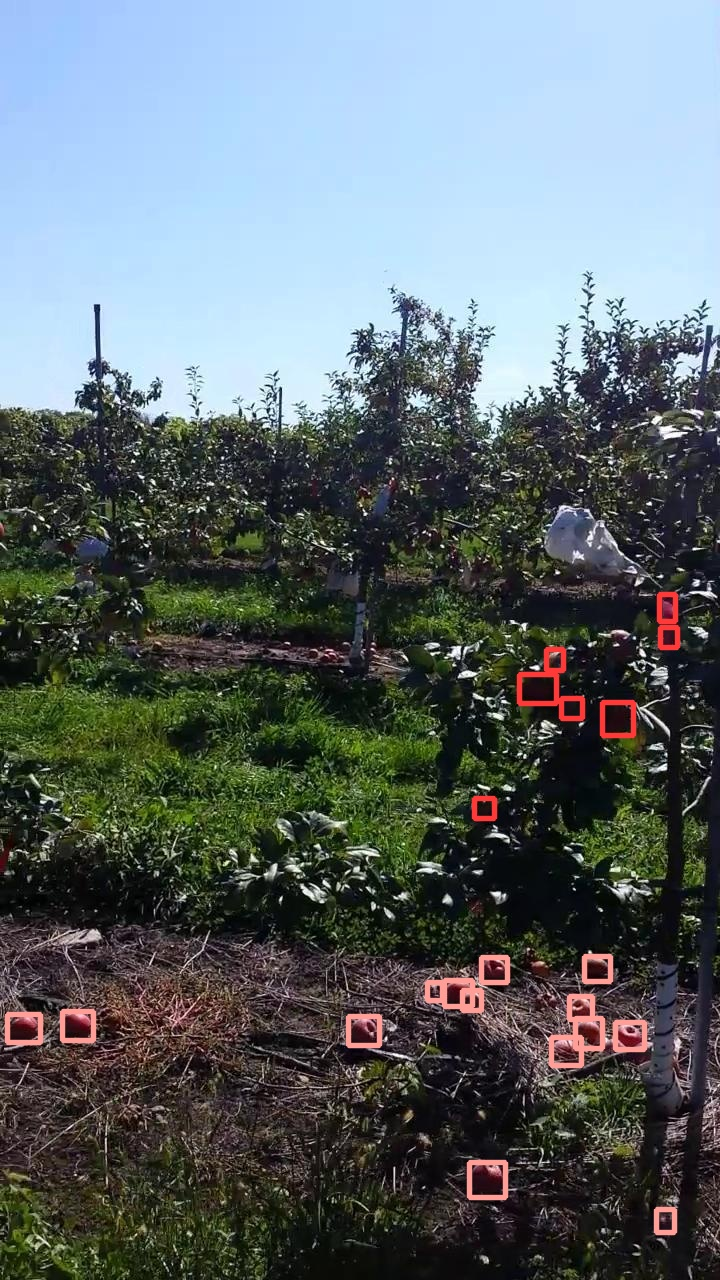

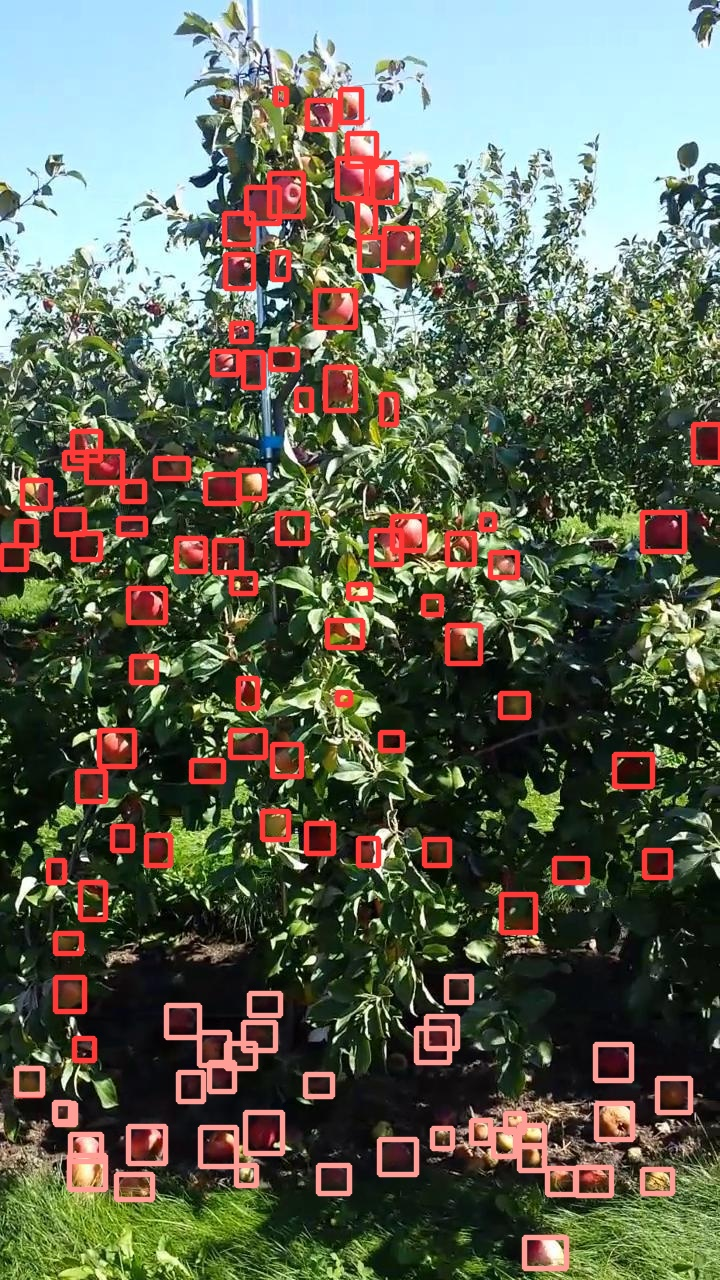

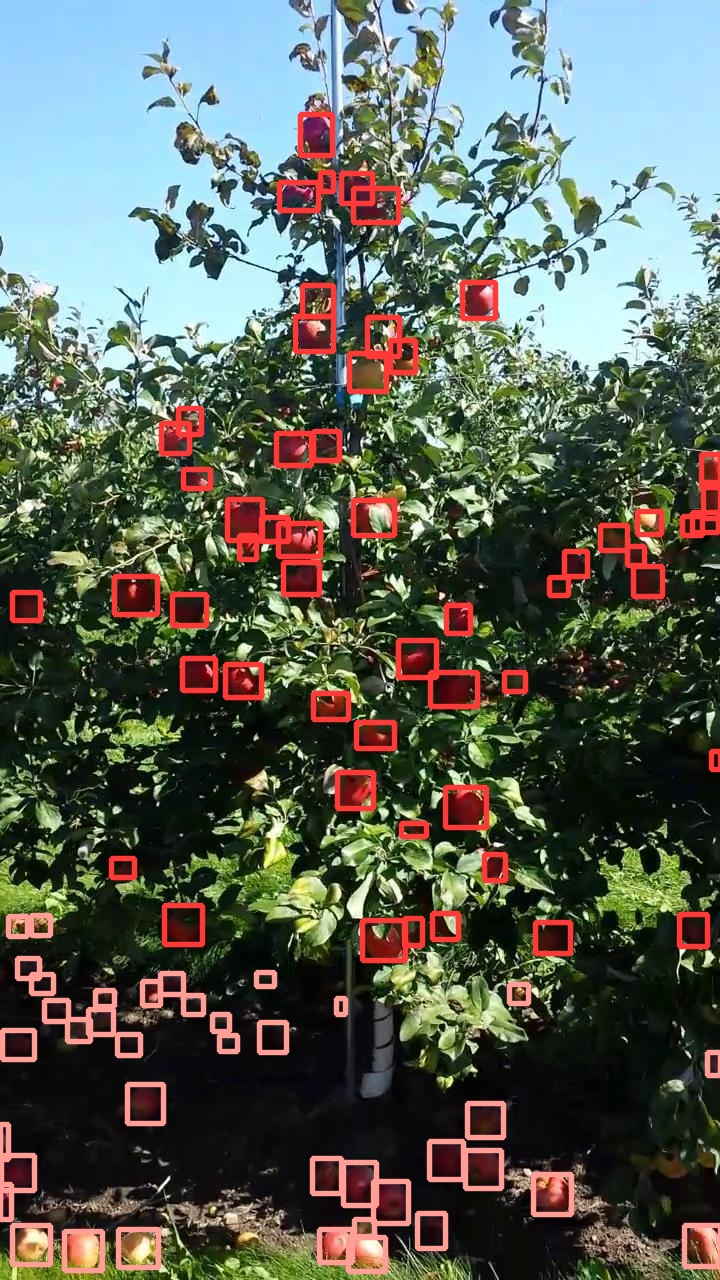

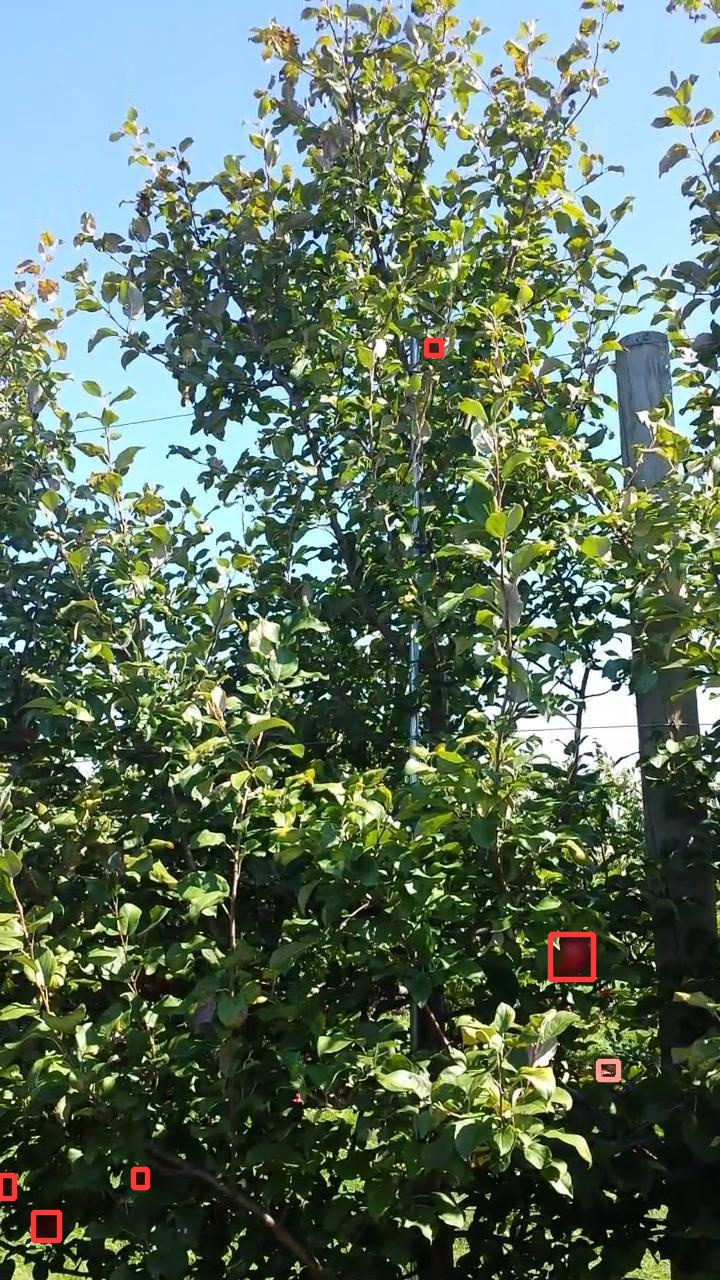

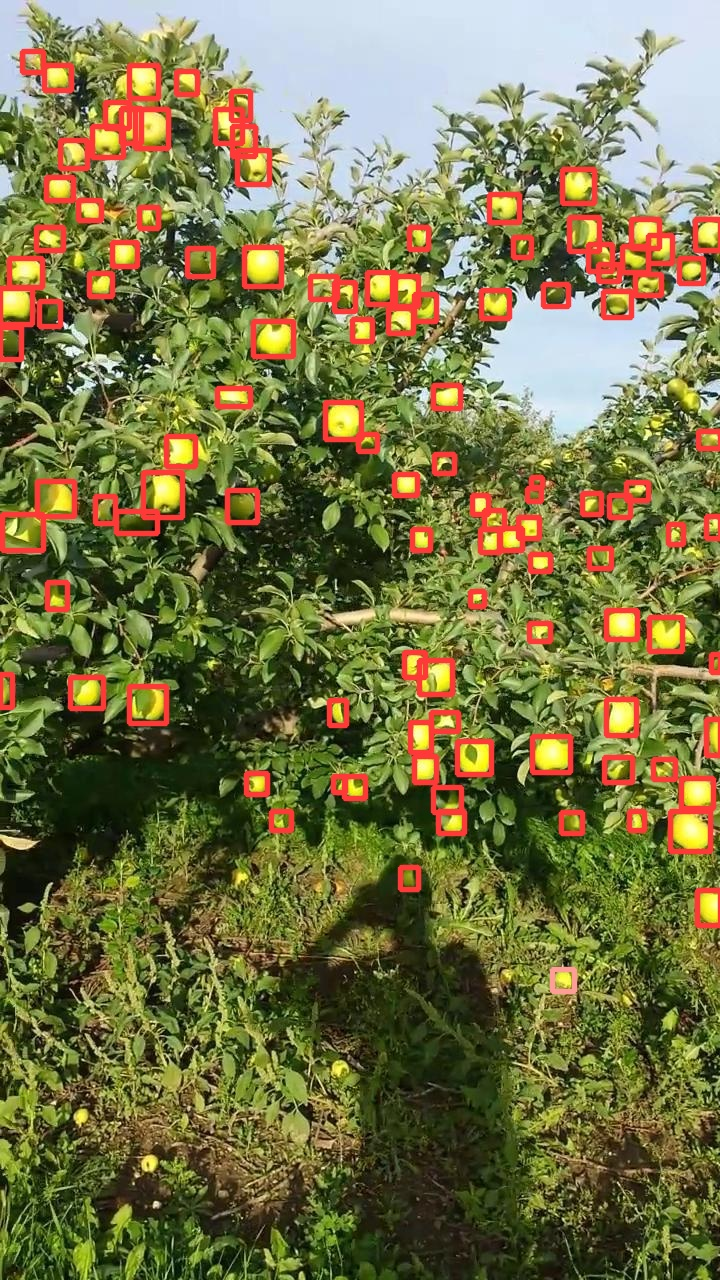

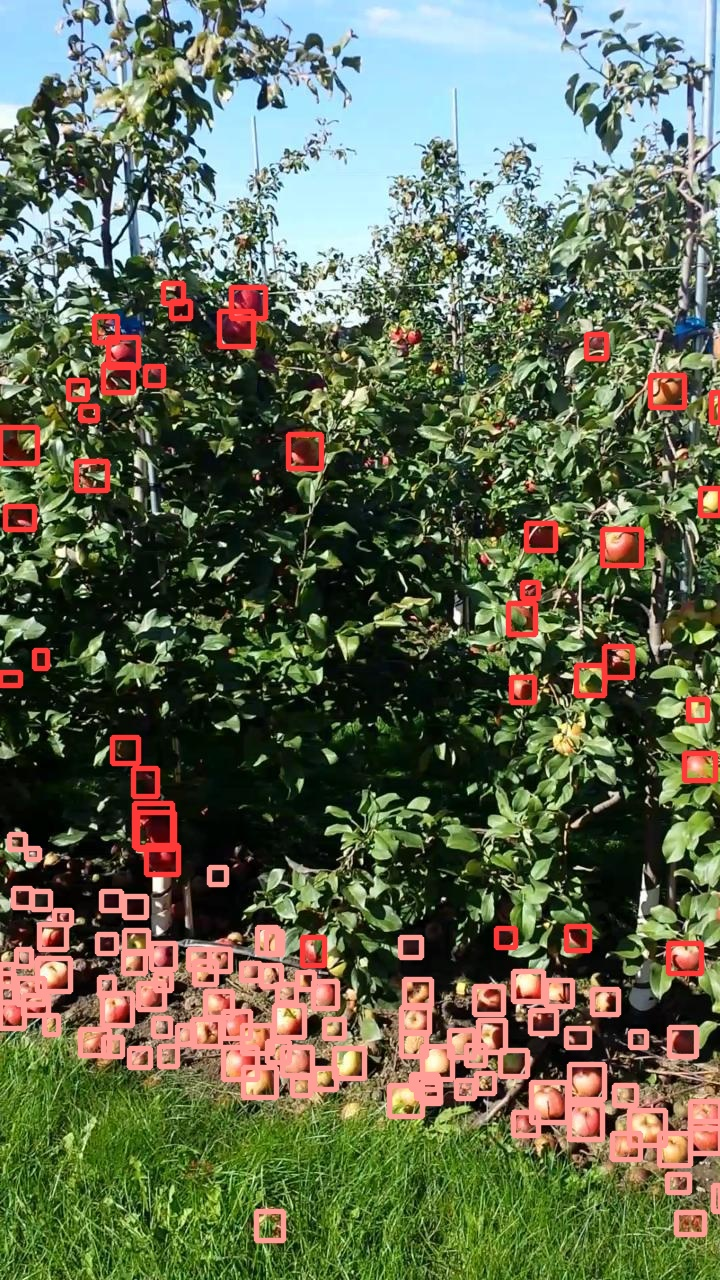

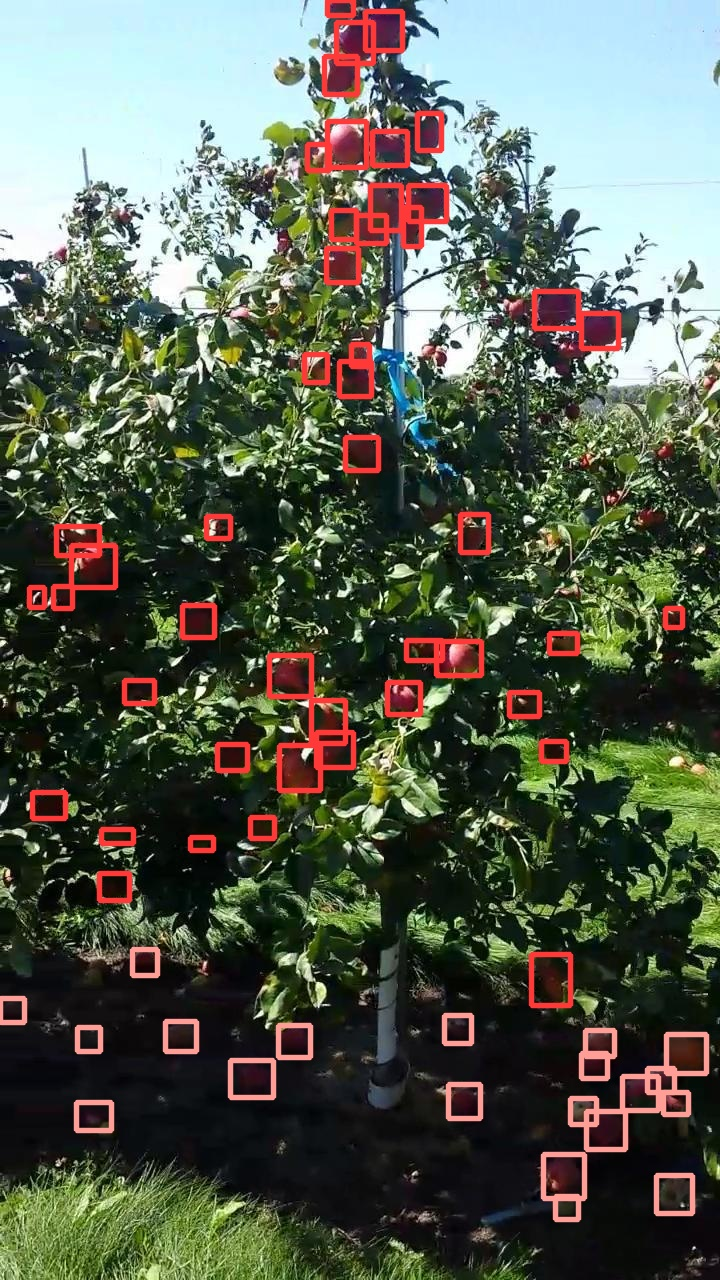

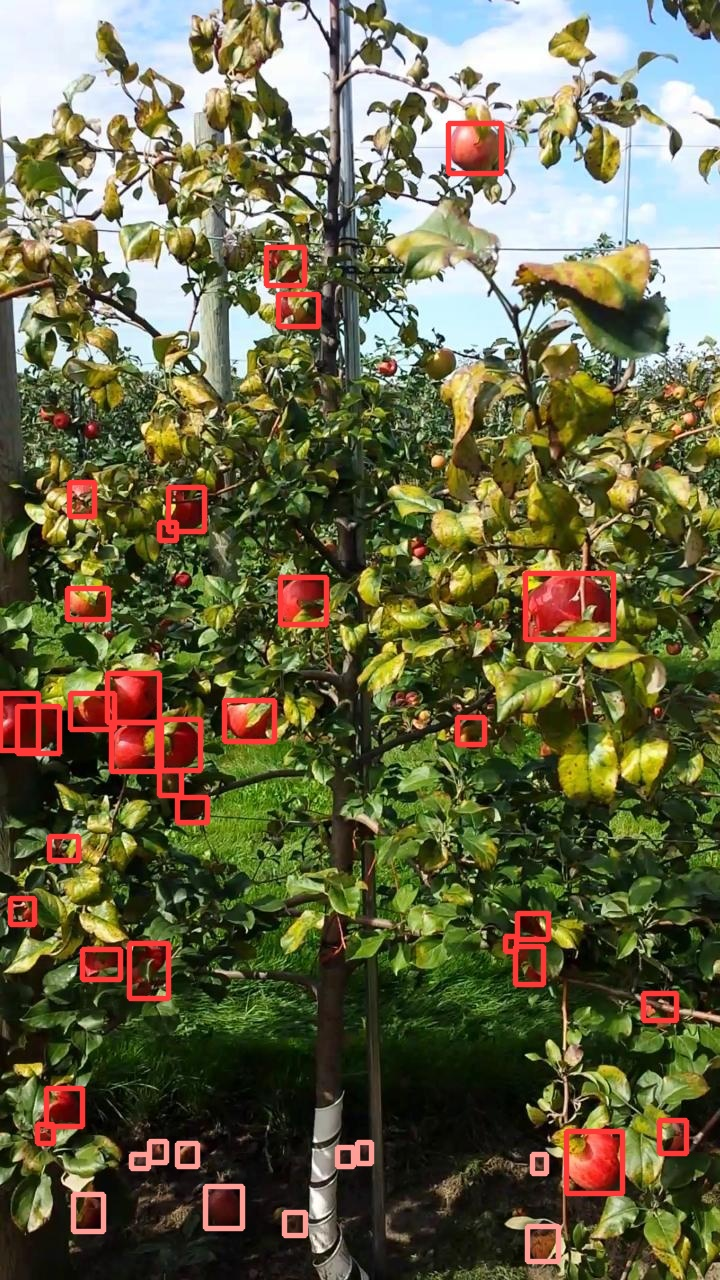

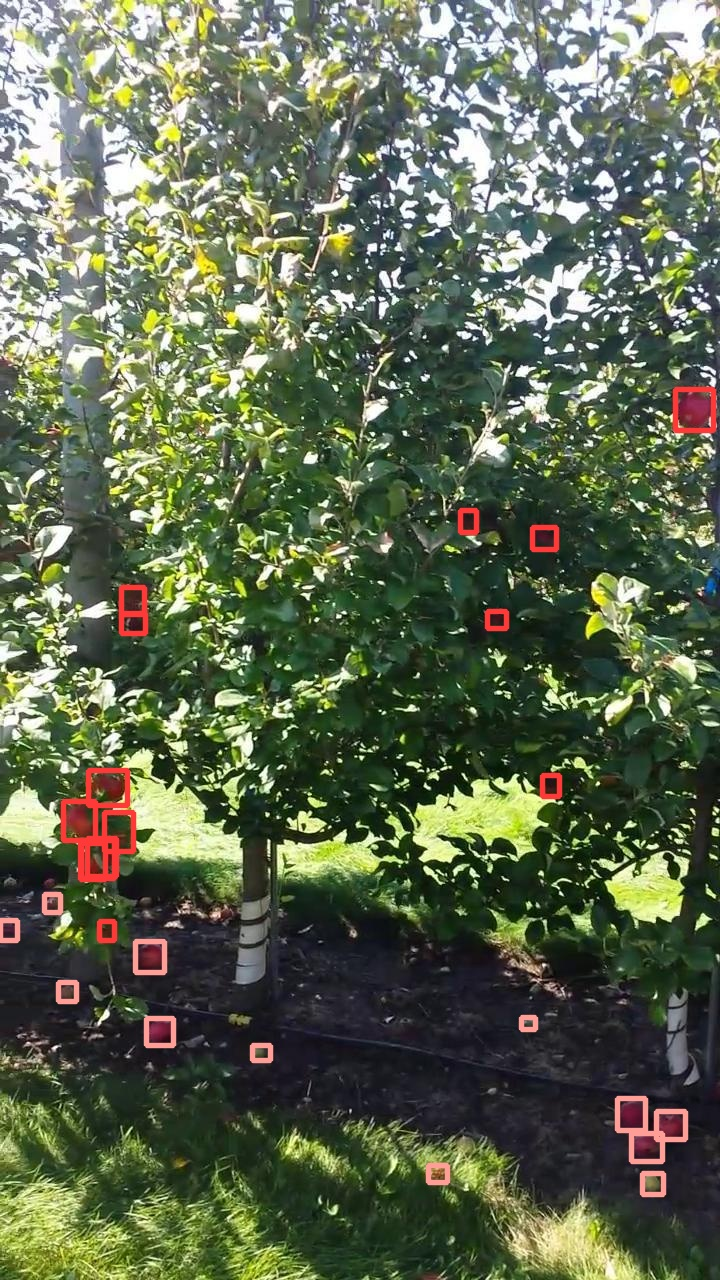

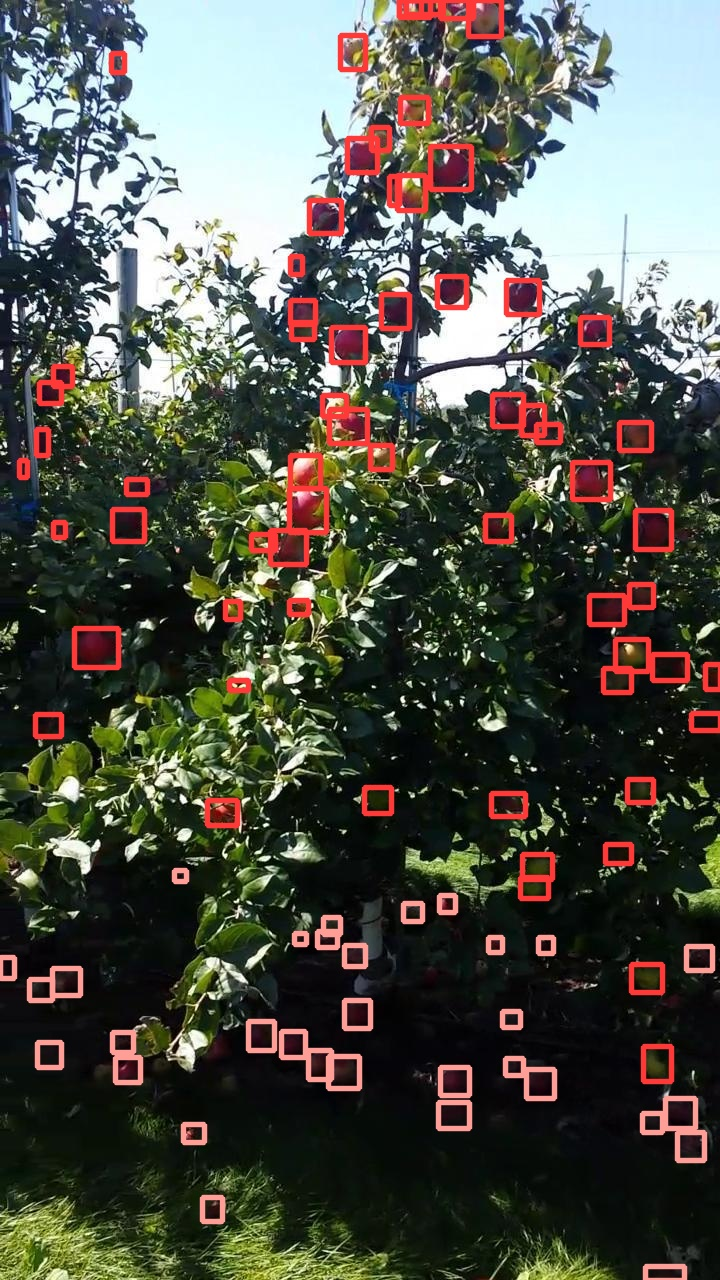

In [37]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict4/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")